In [2]:
from bs4 import BeautifulSoup

html = """
<!DOCTYPE html>
<html lang="ko">
  <head>
    <meta charset="UTF-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1.0" />
    <title>Document</title>
  </head>
  <body>
    <div id="main">
      <h1 class="title">파이썬 스크립핑</h1>
      <h1 class="test">테스트</h1>
      <p class="desc">데이터추출</p>
      <a href="https://example.com" class="link">더알아보기</a>
      <ul class="items">
        <li data-id="101">첫번째</li>
        <li data-id="102">두번째</li>
        <li data-id="103">세번째</li>
      </ul>
    </div>
  </body>
</html>
"""

soup = BeautifulSoup(html,"html.parser")

In [8]:
# 1. find() 
h1_tag = soup.find("h1").text
print(h1_tag)

파이썬 스크립핑


In [9]:
# 2.find("<tag>", class_="")
h1_class = soup.find("h1", class_="test").text
h1_class

'테스트'

In [ ]:
# 3. find_all()
h1_all = soup.find_all("h1")
print(type(h1_all[0]))
print(h1_all)
h1_all[0].text

<class 'bs4.element.Tag'>
[<h1 class="title">파이썬 스크립핑</h1>, <h1 class="test">테스트</h1>]


'파이썬 스크립핑'

In [12]:
# 4. select("css")
css_li = soup.select(".items li")
for item in css_li:
    print(f'- {item.text}')


- 첫번째
- 두번째
- 세번째


In [19]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://finance.yahoo.com/quote/005930.KS/history'

# headers 이 없으면 에러. Edge: Too Many Requests
headers = {"User-Agent":'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/143.0.0.0 Safari/537.36'
           ,'accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7'
        }

res = requests.get(url, headers=headers)
html = res.text
soup = BeautifulSoup(html, "html.parser")
first_tr = soup.find("tr")
first_class = first_tr.get("class")[0]
# print(first_class)
# print(soup.find_all("td", class_=first_class)[0].text)
# print(soup.find_all("td", class_=first_class)[1].text)
# print(soup.find_all("td", class_=first_class)[2].text)
# print(soup.find_all("td", class_=first_class)[3].text)
# print(soup.find_all("td", class_=first_class)[4].text)
# print(soup.find_all("td", class_=first_class)[5].text)
# print(soup.find_all("td", class_=first_class)[6].text)
# print(soup.find_all("td", class_=first_class)[7].text)

# first_data = pd.to_datetime().strftime('%Y년 %m월 %d일')
first_data = pd.to_datetime(soup.find_all("td", class_=first_class)[0].text).strftime('%Y년 %m월 %d일')
print(first_data)
first_price = soup.find_all("td", class_=first_class)[1].text.replace('.00', '원')
print(first_price)

2026년 01월 05일
134,600원


In [ ]:
rows = soup.find_all("tr", class_=first_class)
print(len(rows))
dates = []
prices = []
for i in range(1, len(rows)):
    cells = rows[i].find_all('td')
    # print(cells)
    if len(cells) == 7:
        date = pd.to_datetime(cells[0].text)
        close_price = cells[4].text.replace(',', '').replace('.', '')
        dates.append(date)
        prices.append(int(close_price))
        # print(f'{date} 종가는 {close_price} 입니다.')

dates.reverse()
prices.reverse()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    241 non-null    datetime64[ns]
 1   price   241 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.9 KB


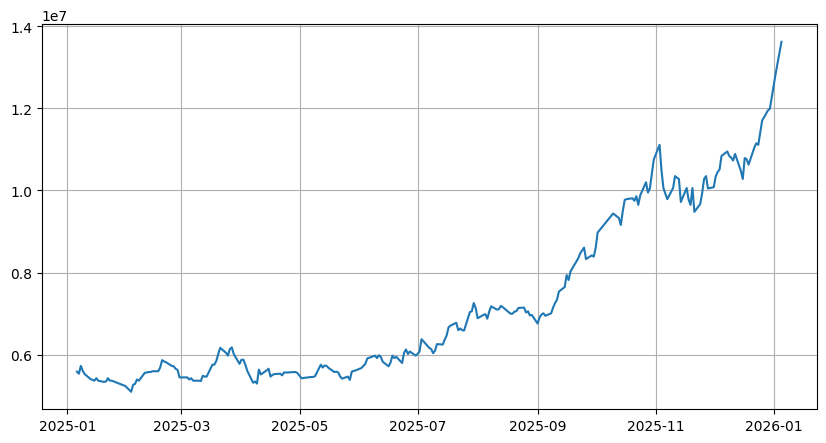

In [56]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

stock_data = pd.DataFrame({'date' : dates, 'price' : prices})
stock_data.info()
# min_price = min(stock_data['price'])
# max_price = max(stock_data['price'])
# y_ticks = range(min_price, max_price, 3000)

plt.figure(figsize=(10,5))
plt.plot(stock_data['date'], stock_data['price'])
plt.grid(True)
# plt.yticks(y_ticks)
plt.show()

In [ ]:
import pandas as pd
import requests
from io import StringIO

stock_data = pd.DataFrame()
url = 'https://finance.yahoo.com/quote/005930.KS/history'

# headers 이 없으면 에러. Edge: Too Many Requests
headers = {"User-Agent":'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/143.0.0.0 Safari/537.36'
           ,'accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7'
        }
res = requests.get(url, headers=headers)
stock_data = pd.read_html( StringIO(str(res.text)), header=0)[0] # 첫번째 테이블
stock_data.columns = ['날짜', '시가', '고가','저가', '종가','조정증가', '거래량']

In [63]:
stock_data['날짜'] = pd.to_datetime(stock_data['날짜'])
stock_data.info()
stock_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      244 non-null    datetime64[ns]
 1   시가      244 non-null    object        
 2   고가      244 non-null    object        
 3   저가      244 non-null    object        
 4   종가      244 non-null    object        
 5   조정증가    244 non-null    object        
 6   거래량     244 non-null    object        
dtypes: datetime64[ns](1), object(6)
memory usage: 13.5+ KB


,날짜,시가,고가,저가,종가,조정증가,거래량
0,2026-01-05,134600.00,137800.00,133600.00,137700.00,137700.00,33603526
1,2026-01-02,120200.00,128500.00,120200.00,128500.00,128500.00,30463279
2,2025-12-30,119100.00,121200.00,118700.00,119900.00,119900.00,19746349
3,2025-12-29,119400.00,119700.00,118200.00,119500.00,119500.00,19676004
4,2025-12-26,112400.00,117000.00,112400.00,117000.00,117000.00,34018174


In [64]:
stock_data.isna().count()

날짜      244
시가      244
고가      244
저가      244
종가      244
조정증가    244
거래량     244
dtype: int64

In [67]:
stock_data.to_csv('out.csv', index=False, encoding='utf-8-sig')

In [ ]:
import yfinance as yf
import pandas as pd
# ticker = yf.Ticker('005930.KS') 삼성전자
ticker = yf.Ticker('TSLA') 
df = ticker.history(period='1y')
df.tail()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-12-26 00:00:00-05:00,485.230011,489.089996,473.820007,475.190002,58780700,0.0,0.0
2025-12-29 00:00:00-05:00,469.000000,469.399994,459.000000,459.640015,66263000,0.0,0.0
2025-12-30 00:00:00-05:00,461.089996,463.119995,453.829987,454.429993,59238500,0.0,0.0
2025-12-31 00:00:00-05:00,456.100006,456.549988,449.299988,449.720001,49078000,0.0,0.0
2026-01-02 00:00:00-05:00,457.799988,458.339996,435.299988,438.070007,85263000,0.0,0.0


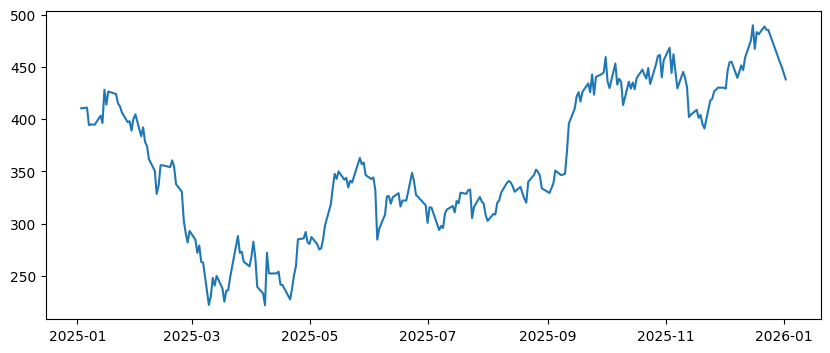

In [75]:

plt.figure(figsize=(10,4))

# df.index Date, df['Close'] :종가
plt.plot(df.index, df['Close'])
plt.show()